In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Compute the species overlap $\omega_{si}$ from empirical data

The goal of this script is to get an empirical boundary on what the spatial overlap of species might be.  This metric is not perfect, but provides some empirical bounds on how $\omega_{si}$ varies in our system.

In [4]:
dat = pd.read_csv("../data/ves_observations.csv")
pipe_dat = pd.read_csv("../data/pipe_dataframe.csv")

In [3]:
%matplotlib inline

# Site 2: Woodlot

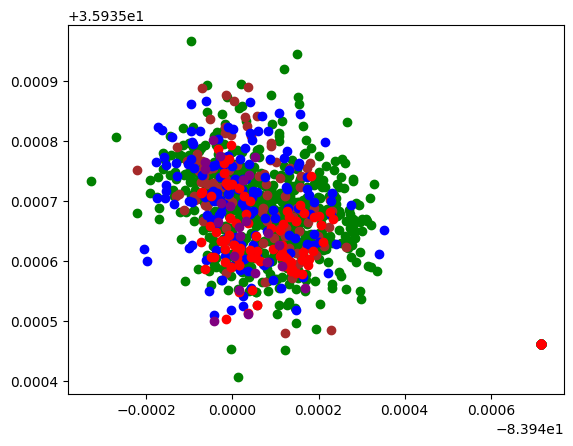

In [5]:
# Just plot racl and raca across sites
sites = [2]

for site in sites:
    
    tdat = dat.query(f"site_id == {site}")
    
    # Drop measurement error
    tdat = tdat[(tdat.longitude_ves > -83.942) & (tdat.longitude_ves < -83.938)]

    racl = tdat.query("species == 'racl'")
    raca = tdat.query("species == 'raca'")
    pscr = tdat.query("species == 'pscr'")
    hych = tdat.query("species == 'hych'")
    psfe = tdat.query("species == 'psfe'")
    
    plt.plot(racl.longitude_ves, racl.latitude_ves, 'o', color='green')
    plt.plot(raca.longitude_ves, raca.latitude_ves, 'o', color='brown')
    plt.plot(pscr.longitude_ves, pscr.latitude_ves, 'o', color='blue')
    plt.plot(hych.longitude_ves, hych.latitude_ves, 'o', color='red')
    plt.plot(psfe.longitude_ves, psfe.latitude_ves, 'o', color='purple')

In [6]:
from scipy.stats import gaussian_kde 

xy_racl = racl[['longitude_ves', 'latitude_ves']].values.T
xy_raca = raca[['longitude_ves', 'latitude_ves']].values.T
xy_pscr = pscr[['longitude_ves', 'latitude_ves']].values.T
xy_psfe = psfe[['longitude_ves', 'latitude_ves']].values.T
xy_hych = hych[['longitude_ves', 'latitude_ves']].values.T

minx, miny = np.min(np.hstack([xy_racl, xy_raca, xy_pscr, xy_hych, xy_psfe]), axis=1)
maxx, maxy = np.max(np.hstack([xy_racl, xy_raca, xy_pscr, xy_hych, xy_psfe]), axis=1)

xvals = np.linspace(minx, maxx, num=100)
yvals = np.linspace(miny, maxy, num=100)
X, Y = np.meshgrid(xvals, yvals)

kde_racl = gaussian_kde(xy_racl)
kde_raca = gaussian_kde(xy_raca)
kde_pscr = gaussian_kde(xy_pscr)
kde_psfe = gaussian_kde(xy_psfe)
kde_hych = gaussian_kde(xy_hych)

# Make the grid for interpolation
positions = np.vstack([X.ravel(), Y.ravel()])
Z_raca = np.reshape(kde_raca(positions).T, X.shape)
Z_racl = np.reshape(kde_racl(positions).T, X.shape)
Z_pscr = np.reshape(kde_pscr(positions).T, X.shape)
Z_psfe = np.reshape(kde_psfe(positions).T, X.shape)
Z_hych = np.reshape(kde_hych(positions).T, X.shape)

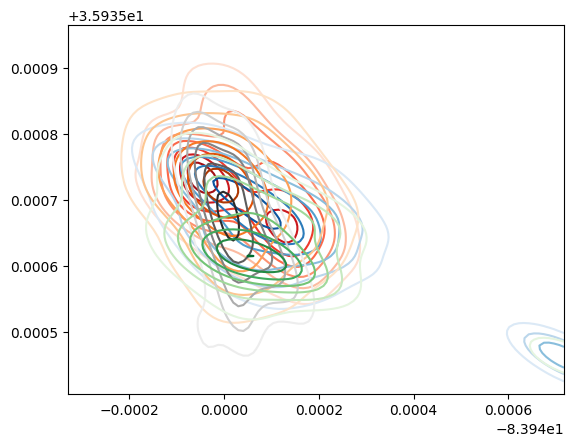

In [7]:
plt.contour(X, Y, Z_raca, cmap="Reds")
plt.contour(X, Y, Z_racl, cmap="Blues")
plt.contour(X, Y, Z_pscr, cmap="Oranges")
plt.contour(X, Y, Z_psfe, cmap="Greys")
plt.contour(X, Y, Z_hych, cmap="Greens")

In [148]:
# Compute the overlaps
combos = [Z_raca, Z_racl, Z_pscr, Z_psfe, Z_hych]
names = ['raca', 'racl', 'pscr', 'psfe', 'hych']
for i in range(len(combos)):
    for j in range(len(combos)):
        print("\n" + names[j] + "/" + names[i])
        print(np.sum(np.sum(combos[i] * combos[j]) / np.sum(combos[i] * combos[i])))


raca/raca
1.0

racl/raca
0.818721409012903

pscr/raca
0.8150302805879002

psfe/raca
0.8692604902940688

hych/raca
0.7444741434668146

raca/racl
1.0396215328334268

racl/racl
1.0

pscr/racl
0.8953641232124155

psfe/racl
1.03576383199154

hych/racl
0.9662297961369197

raca/pscr
1.066868569585691

racl/pscr
0.9229915943179048

pscr/pscr
1.0

psfe/pscr
1.163138365014237

hych/pscr
0.9070257466521033

raca/psfe
0.6008943413074543

racl/psfe
0.5638580647354589

pscr/psfe
0.6142460578965665

psfe/psfe
1.0

hych/psfe
0.6633847676370912

raca/hych
0.7511406137367796

racl/hych
0.7677378157518201

pscr/hych
0.6991237637703178

psfe/hych
0.9682532142845055

hych/hych
1.0


# Site: Hastie

<IPython.core.display.Javascript object>


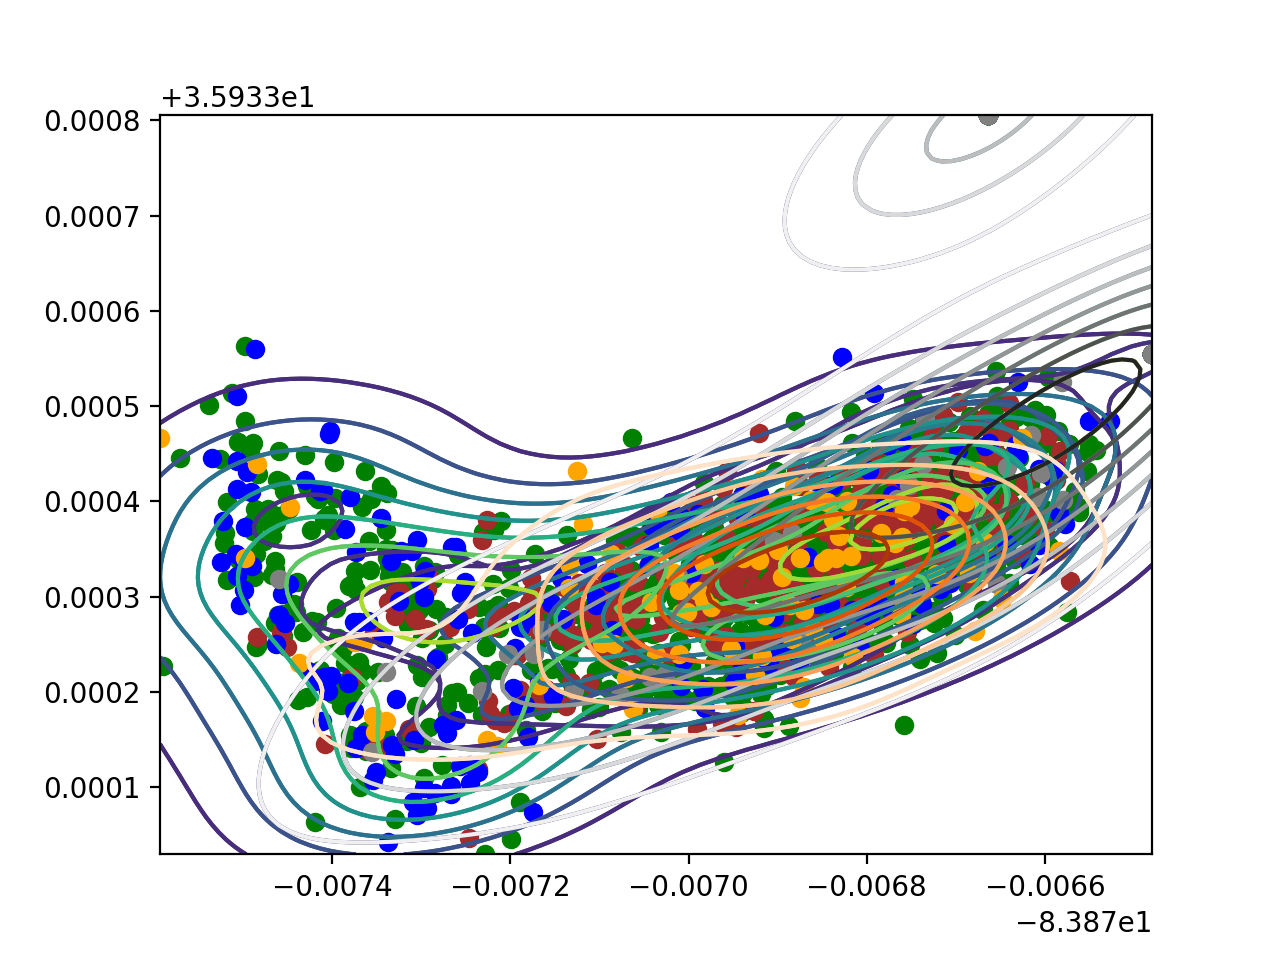

In [150]:
sites = [15]

for site in sites:
    
    tdat = dat.query(f"site_id == {site}")
    pdat = pipe_dat.query(f"site_id == {site}")
    
    # Drop measurement error
    tdat = tdat[(tdat.latitude_ves > 35.932) & (tdat.latitude_ves < 35.934)]
    pdat = pdat[(pdat.latitude_pipe > 35.932) & (pdat.latitude_pipe < 35.934) & (pdat.longitude_pipe > -83.92)].query("newt_count > 0")
    
    racl = tdat.query("species == 'racl'")
    raca = tdat.query("species == 'raca'")
    pscr = tdat.query("species == 'pscr'")
    hych = tdat.query("species == 'hych'")
    
    plt.plot(racl.longitude_ves, racl.latitude_ves, 'o', color='green')
    plt.plot(raca.longitude_ves, raca.latitude_ves, 'o', color='brown')
    plt.plot(pscr.longitude_ves, pscr.latitude_ves, 'o', color='blue')
    plt.plot(hych.longitude_ves, hych.latitude_ves, 'o', color='grey')
    plt.plot(pdat.longitude_pipe, pdat.latitude_pipe, 'o', color="orange")

In [151]:
from scipy.stats import gaussian_kde 

xy_racl = racl[['longitude_ves', 'latitude_ves']].values.T
xy_raca = raca[['longitude_ves', 'latitude_ves']].values.T
xy_pscr = pscr[['longitude_ves', 'latitude_ves']].values.T
xy_hych = hych[['longitude_ves', 'latitude_ves']].values.T
xy_novi = pdat[['longitude_pipe', 'latitude_pipe']].values.T

minx, miny = np.min(np.hstack([xy_racl, xy_raca, xy_pscr, xy_novi, xy_hych]), axis=1)
maxx, maxy = np.max(np.hstack([xy_racl, xy_raca, xy_pscr, xy_novi, xy_hych]), axis=1)

xvals = np.linspace(minx, maxx, num=100)
yvals = np.linspace(miny, maxy, num=100)
X, Y = np.meshgrid(xvals, yvals)

kde_racl = gaussian_kde(xy_racl)
kde_raca = gaussian_kde(xy_raca)
kde_pscr = gaussian_kde(xy_pscr)
kde_novi = gaussian_kde(xy_novi)
kde_hych = gaussian_kde(xy_hych)

# Make the grid for interpolation
positions = np.vstack([X.ravel(), Y.ravel()])
Z_raca = np.reshape(kde_raca(positions).T, X.shape)
Z_racl = np.reshape(kde_racl(positions).T, X.shape)
Z_pscr = np.reshape(kde_pscr(positions).T, X.shape)
Z_novi = np.reshape(kde_novi(positions).T, X.shape)
Z_hych = np.reshape(kde_hych(positions).T, X.shape)

In [153]:
plt.contour(X, Y, Z_raca)
plt.contour(X, Y, Z_racl)
plt.contour(X, Y, Z_pscr)
plt.contour(X, Y, Z_hych, cmap='Greys')
plt.contour(X, Y, Z_novi, cmap="Oranges")

In [154]:
combos = [Z_raca, Z_racl, Z_pscr, Z_novi, Z_hych]
names = ['raca', 'racl', 'pscr', 'novi', 'hych']
for i in range(len(combos)):
    for j in range(len(combos)):
        print("\n" + names[j] + "/" + names[i])
        print(np.sum(np.sum(combos[i] * combos[j]) / np.sum(combos[i] * combos[i])))


raca/raca
1.0

racl/raca
0.8601164014358551

pscr/raca
0.4401941379135929

novi/raca
0.8109054514372583

hych/raca
0.4473191134340026

raca/racl
1.0887108756415957

racl/racl
1.0

pscr/racl
0.5165819018271317

novi/racl
0.9256655931031008

hych/racl
0.5220932329380741

raca/pscr
1.2100476156085676

racl/pscr
1.121868774448357

pscr/pscr
1.0

novi/pscr
1.134634334454028

hych/pscr
0.7050793104063253

raca/novi
1.0291982364412058

racl/novi
0.9281701611730415

pscr/novi
0.5238736192260354

novi/novi
1.0

hych/novi
0.46689272854375236

raca/hych
1.4664026964682255

racl/hych
1.352161378719408

pscr/hych
0.8408442538793709

novi/hych
1.2059355332569524

hych/hych
1.0


# Site 7:  Lotus

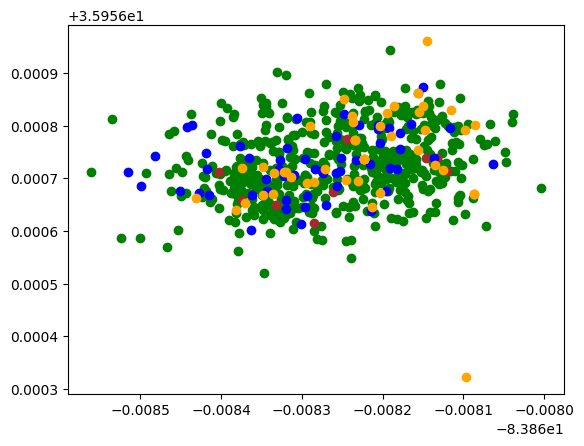

In [122]:

sites = [7]

for site in sites:
    
    tdat = dat.query(f"site_id == {site}")
    pdat = pipe_dat.query(f"site_id == {site}")
    
    # Drop measurement error
    tdat = tdat[(tdat.longitude_ves > -83.869) & (tdat.longitude_ves < -83.867)]
    pdat = pdat[(pdat.longitude_pipe > -83.869) & (pdat.longitude_pipe < -83.867)].query("newt_count > 0")
    
    racl = tdat.query("species == 'racl'")
    raca = tdat.query("species == 'raca'")
    pscr = tdat.query("species == 'pscr'")
    
    plt.plot(racl.longitude_ves, racl.latitude_ves, 'o', color='green')
    plt.plot(raca.longitude_ves, raca.latitude_ves, 'o', color='brown')
    plt.plot(pscr.longitude_ves, pscr.latitude_ves, 'o', color='blue')
    plt.plot(pdat.longitude_pipe, pdat.latitude_pipe, 'o', color="orange")

In [123]:
from scipy.stats import gaussian_kde 

xy_racl = racl[['longitude_ves', 'latitude_ves']].values.T
xy_raca = raca[['longitude_ves', 'latitude_ves']].values.T
xy_pscr = pscr[['longitude_ves', 'latitude_ves']].values.T
xy_novi = pdat[['longitude_pipe', 'latitude_pipe']].values.T

minx, miny = np.min(np.hstack([xy_racl, xy_raca, xy_pscr, xy_novi]), axis=1)
maxx, maxy = np.max(np.hstack([xy_racl, xy_raca, xy_pscr, xy_novi]), axis=1)

xvals = np.linspace(minx, maxx, num=100)
yvals = np.linspace(miny, maxy, num=100)
X, Y = np.meshgrid(xvals, yvals)

kde_racl = gaussian_kde(xy_racl)
kde_raca = gaussian_kde(xy_raca)
kde_pscr = gaussian_kde(xy_pscr)
kde_novi = gaussian_kde(xy_novi)

# Make the grid for interpolation
positions = np.vstack([X.ravel(), Y.ravel()])
Z_raca = np.reshape(kde_raca(positions).T, X.shape)
Z_racl = np.reshape(kde_racl(positions).T, X.shape)
Z_pscr = np.reshape(kde_pscr(positions).T, X.shape)
Z_novi = np.reshape(kde_novi(positions).T, X.shape)

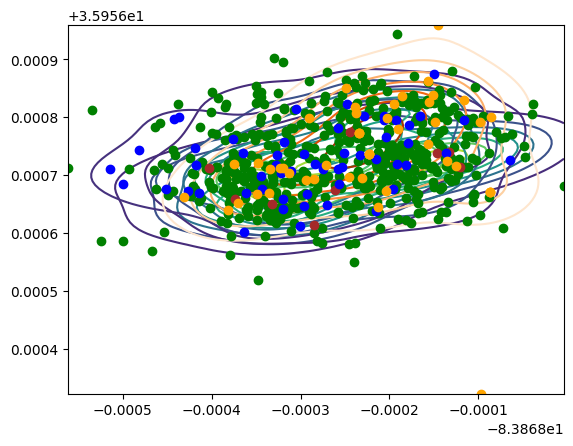

In [124]:
plt.contour(X, Y, Z_raca)
plt.contour(X, Y, Z_racl)
plt.contour(X, Y, Z_pscr)
plt.contour(X, Y, Z_novi, cmap="Oranges")

plt.plot(racl.longitude_ves, racl.latitude_ves, 'o', color='green')
plt.plot(raca.longitude_ves, raca.latitude_ves, 'o', color='brown')
plt.plot(pscr.longitude_ves, pscr.latitude_ves, 'o', color='blue')
plt.plot(pdat.longitude_pipe, pdat.latitude_pipe, 'o', color="orange")

In [125]:
combos = [Z_raca, Z_racl, Z_pscr, Z_novi]
names = ['raca', 'racl', 'pscr', 'novi']
for i in range(len(combos)):
    for j in range(len(combos)):
        print("\n" + names[j] + "/" + names[i])
        print(np.sum(np.sum(combos[i] * combos[j]) / np.sum(combos[i] * combos[i])))


raca/raca
1.0

racl/raca
0.840809226173825

pscr/raca
0.8201590063784315

novi/raca
0.7229876065890112

raca/racl
0.9625086329099981

racl/racl
1.0

pscr/racl
0.983865036497025

novi/racl
0.9079600097430676

raca/pscr
0.8510406746667722

racl/pscr
0.8918270100928687

pscr/pscr
1.0

novi/pscr
0.8447508479839133

raca/novi
0.882548490382894

racl/novi
0.968204907575136

pscr/novi
0.9937659248967099

novi/novi
1.0


# Complex: 10

In [126]:
%matplotlib notebook

<IPython.core.display.Javascript object>


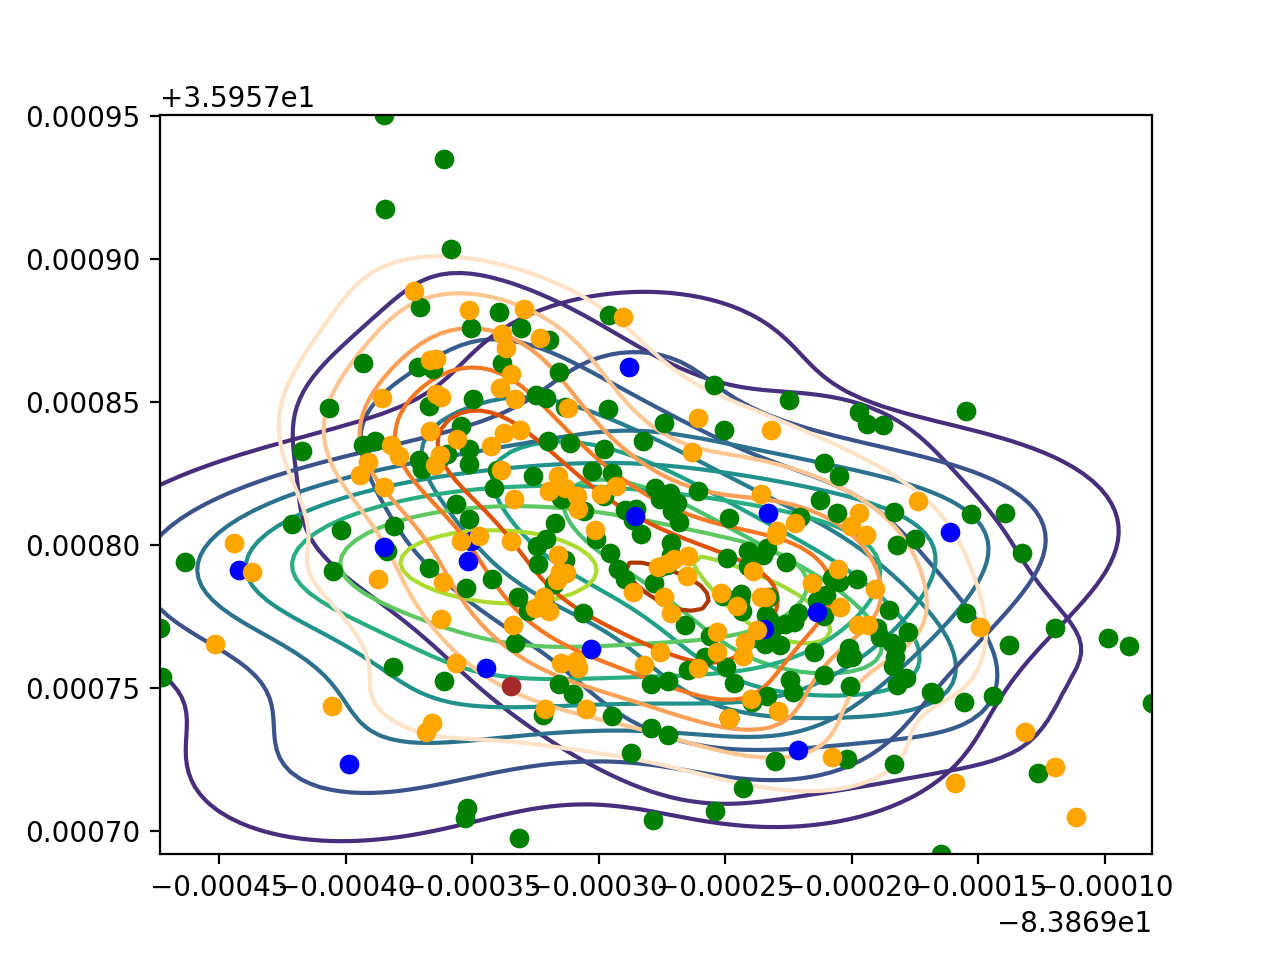

In [131]:
# Just plot racl and raca across sites
sites = [10] #[2, 7, 10, 15]
    
tdat = dat.query(f"site_id == {site}")
pdat = pipe_dat.query(f"site_id == {site}")

# Set-up newts
tdat = tdat[(tdat.longitude_ves > -83.869593) & (tdat.longitude_ves < -83.868968)]
#pdat = pdat[(pdat.longitude_pipe > -83.869) & (pdat.longitude_pipe < -83.867)].query("newt_count > 0")

racl = tdat.query("species == 'racl'")
raca = tdat.query("species == 'raca'")
pscr = tdat.query("species == 'pscr'")
novi = tdat.query("species == 'novi'")

plt.plot(racl.longitude_ves, racl.latitude_ves, 'o', color='green')
plt.plot(raca.longitude_ves, raca.latitude_ves, 'o', color='brown')
plt.plot(pscr.longitude_ves, pscr.latitude_ves, 'o', color='blue')
plt.plot(novi.longitude_ves, novi.latitude_ves, 'o', color="orange")

In [133]:
from scipy.stats import gaussian_kde 

xy_racl = racl[['longitude_ves', 'latitude_ves']].values.T
xy_pscr = pscr[['longitude_ves', 'latitude_ves']].values.T
xy_novi = novi[['longitude_ves', 'latitude_ves']].values.T

minx, miny = np.min(np.hstack([xy_racl, xy_pscr, xy_novi]), axis=1)
maxx, maxy = np.max(np.hstack([xy_racl, xy_pscr, xy_novi]), axis=1)

xvals = np.linspace(minx, maxx, num=100)
yvals = np.linspace(miny, maxy, num=100)
X, Y = np.meshgrid(xvals, yvals)

kde_racl = gaussian_kde(xy_racl)
kde_pscr = gaussian_kde(xy_pscr)
kde_novi = gaussian_kde(xy_novi)

# Make the grid for interpolation
positions = np.vstack([X.ravel(), Y.ravel()])
Z_racl = np.reshape(kde_racl(positions).T, X.shape)
Z_pscr = np.reshape(kde_pscr(positions).T, X.shape)
Z_novi = np.reshape(kde_novi(positions).T, X.shape)

<IPython.core.display.Javascript object>


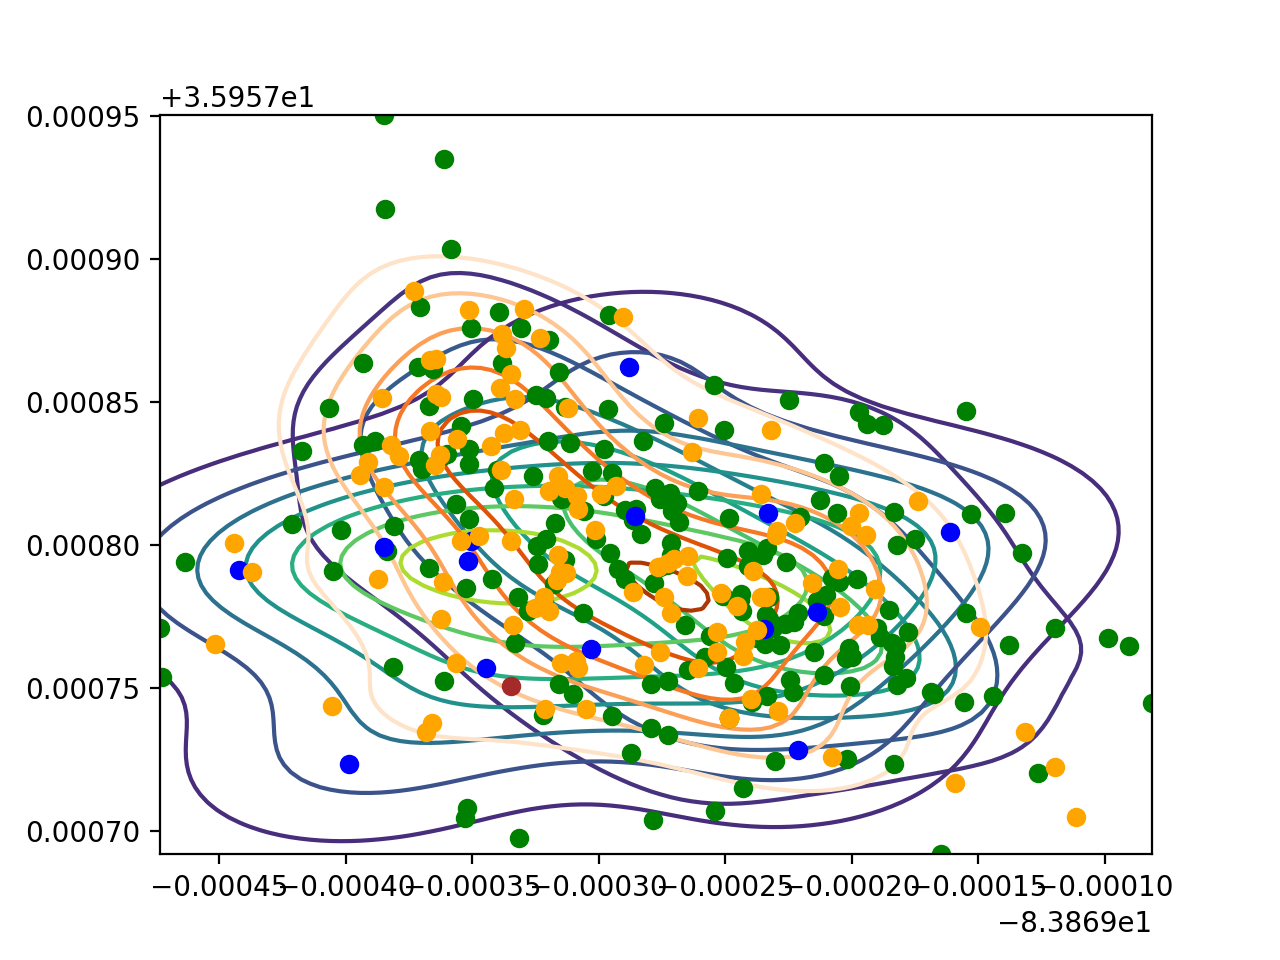

In [135]:
plt.contour(X, Y, Z_racl)
plt.contour(X, Y, Z_pscr)
plt.contour(X, Y, Z_novi, cmap="Oranges")

plt.plot(racl.longitude_ves, racl.latitude_ves, 'o', color='green')
plt.plot(raca.longitude_ves, raca.latitude_ves, 'o', color='brown')
plt.plot(pscr.longitude_ves, pscr.latitude_ves, 'o', color='blue')
plt.plot(novi.longitude_ves, novi.latitude_ves, 'o', color='orange')

In [137]:
combos = [Z_racl, Z_pscr, Z_novi]
names = ['racl', 'pscr', 'novi']
for i in range(len(combos)):
    for j in range(len(combos)):
        print("\n" + names[j] + "/" + names[i])
        print(np.sum(np.sum(combos[i] * combos[j]) / np.sum(combos[i] * combos[i])))


racl/racl
1.0

pscr/racl
0.7903668952465672

novi/racl
0.9971677502246871

racl/pscr
0.9425166812727658

pscr/pscr
1.0

novi/pscr
1.0079464570259766

racl/novi
0.8940863932508697

pscr/novi
0.7578590128974642

novi/novi
1.0
